<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Bayesian Modelling on Auto Data


---

In this lab you will get some practice building models with `pymc3`. Please reference the preceding lesson on estimation and regression with `pymc3` for tips on how to code these models up.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the auto data. Perform any cleaning or EDA necessary.

In [2]:
auto = pd.read_csv('../../../../../resource-datasets/auto_stats/Auto.csv')

In [3]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
print(auto.horsepower.unique())
auto.horsepower = auto.horsepower.map(lambda x: np.nan if x == '?' else float(x))
auto.isnull().sum()

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
auto.dropna(inplace=True)

### 2. Create columns indicating if the car brand is from the USA, Asia, or Europe.

Take into account that some brand names are not given correctly.

In [8]:
auto['maker'] = auto.name.map(lambda x: x.split()[0])
auto['maker'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
saab              4
opel              4
subaru            4
chevy             3
renault           3
maxda             2
bmw               2
cadillac          2
mercedes-benz     2
toyouta           1
triumph           1
chevroelt         1
capri             1
hi                1
nissan            1
vokswagen         1
mercedes          1
Name: maker, dtype: int64

In [9]:
replacements = {'chevroelt':'chevrolet','chevy':'chevrolet','vokswagen':'volkswagen',
 'toyouta':'toyota','maxda':'mazda','mercedes-benz':'mercedes','vw':'volkswagen'}
auto['maker'] = auto.maker.replace(replacements)

In [10]:
auto = auto[(auto['maker']!='hi')]
auto['maker'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
subaru         4
saab           4
opel           4
mercedes       3
renault        3
cadillac       2
bmw            2
triumph        1
capri          1
nissan         1
Name: maker, dtype: int64

In [11]:
american = ['chevrolet','buick','plymouth','amc','ford','pontiac','dodge','mercury',
            'oldsmobile','chrysler','cadillac','capri']
euro = ['volkswagen','peugeot','audi','saab','bmw','opel','fiat','volvo','renault','mercedes','triumph']
asian = ['toyota','datsun','mazda','honda','subaru','nissan']

In [12]:
auto.origin.value_counts(normalize=True)

1    0.624041
3    0.202046
2    0.173913
Name: origin, dtype: float64

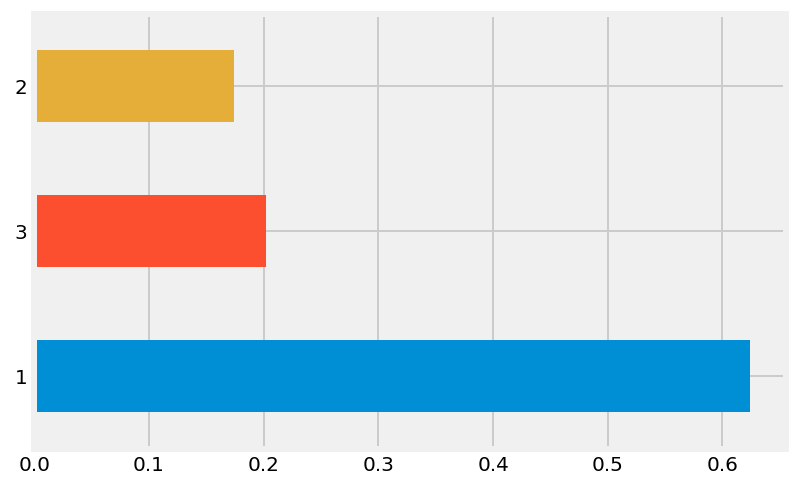

In [13]:
auto.origin.value_counts(normalize=True).plot(kind='barh');

In [14]:
auto.groupby('origin')['maker'].get_group(1).unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'mercury', 'oldsmobile', 'chrysler', 'capri', 'cadillac'],
      dtype=object)

In [15]:
auto.groupby('origin')['maker'].get_group(2).unique()

array(['volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'opel', 'fiat',
       'volvo', 'renault', 'mercedes', 'triumph'], dtype=object)

In [16]:
auto.groupby('origin')['maker'].get_group(3).unique()

array(['toyota', 'datsun', 'mazda', 'honda', 'subaru', 'nissan'],
      dtype=object)

In [17]:
auto['american'] = auto.maker.map(lambda x: 1 if x in american else 0)
auto['euro'] = auto.maker.map(lambda x: 1 if x in euro else 0)
auto['asian'] = auto.maker.map(lambda x: 1 if x in asian else 0)

In [18]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,american,euro,asian
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.482864,5.465473,194.131714,104.242967,2973.097187,15.533760,75.994885,1.578005,0.624041,0.173913,0.202046
std,7.780610,1.703152,104.630650,38.278196,845.826366,2.758323,3.675975,0.806020,0.484990,0.379520,0.402041
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,105.000000,75.000000,2224.500000,13.750000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,125.000000,3611.000000,17.000000,79.000000,2.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


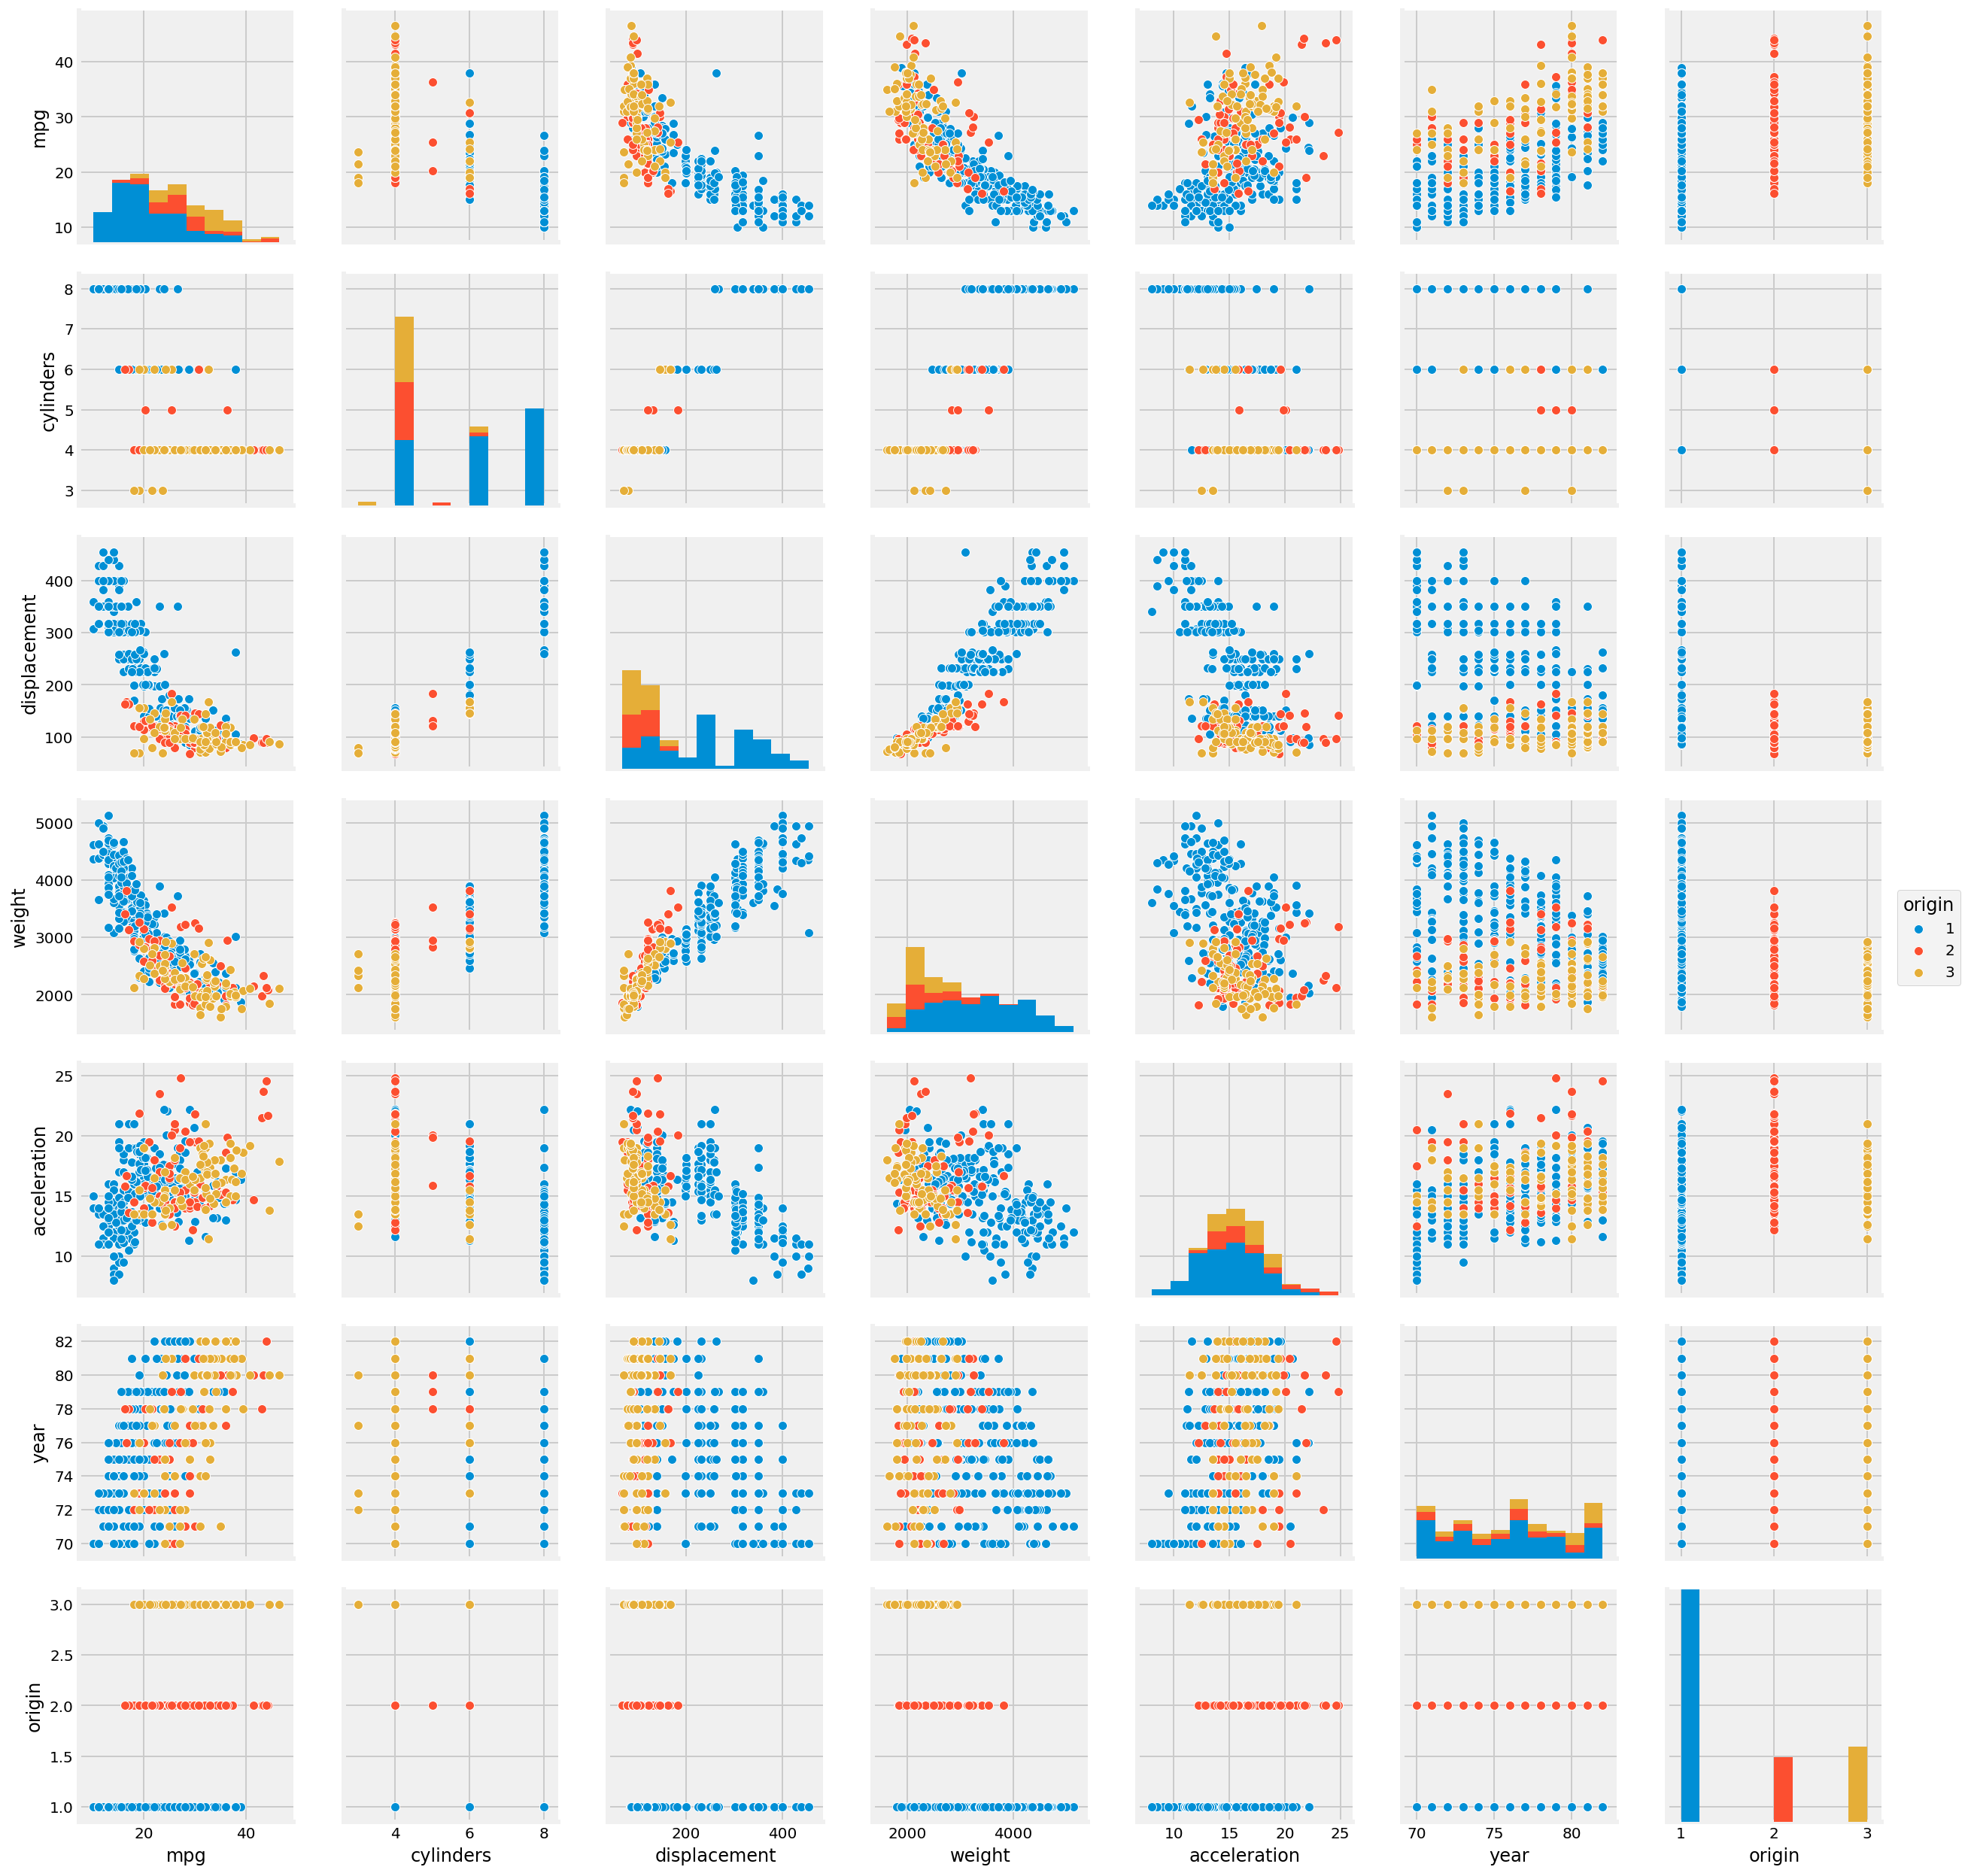

In [19]:
sns.pairplot(auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']], hue='origin')
plt.show()

### 3. Build a model with `pymc3` to estimate the difference in MPG between American and European cars.

Make sure to inspect the results visually using `pymc3`'s built-in plotting functions.

When setting up likelihood and priors, you could choose
- a normal distribution for mpg itself 
- a normal distribution for the mean of mpg 
- a uniform distribution for the standard deviation of mpg

Check [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta_rate-6) for other suggestions.

In [20]:
american_mpg = auto[auto.american == 1].mpg.values
european_mpg = auto[auto.euro == 1].mpg.values

print(american_mpg.mean(), european_mpg.mean())
print(american_mpg.std(), european_mpg.std())

20.078688524590163 27.602941176470587
6.401373181427647 6.53161926117945


In [21]:
import pymc3 as pm

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [22]:
prior_mean = auto.mpg.mean()
prior_std = auto.mpg.std()
print(prior_mean, prior_std)

23.48286445012788 7.78060955884693


#### Using a uniform prior for the standard deviations

In [23]:
std_prior_lower = 0.00001
std_prior_upper = 10.

with pm.Model() as model:
    
    usa_mean = pm.Normal('usa_mean', prior_mean, sd=50)
    euro_mean = pm.Normal('euro_mean', prior_mean, sd=50)
    
    usa_std = pm.Uniform('usa_std', lower=std_prior_lower,upper=std_prior_upper)
    euro_std = pm.Uniform('euro_std',lower=std_prior_lower,upper=std_prior_upper)
    
    usa_mpg = pm.Normal('usa_mpg', mu=usa_mean, sd=usa_std, observed=american_mpg)
    euro_mpg = pm.Normal('euro_mpg', mu=euro_mean, sd=euro_std, observed=european_mpg)
    
    mean_delta = pm.Deterministic('mean_delta', usa_mean - euro_mean)
    std_delta = pm.Deterministic('std_delta', usa_std - euro_std)

In [24]:
with model:
    
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start=start, step=step, njobs=4)

logp = -1,037.7, ||grad|| = 2.4143: 100%|██████████| 19/19 [00:00<00:00, 1263.30it/s] 
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [euro_std_interval__, usa_std_interval__, euro_mean, usa_mean]
100%|██████████| 50500/50500 [02:03<00:00, 409.52it/s]


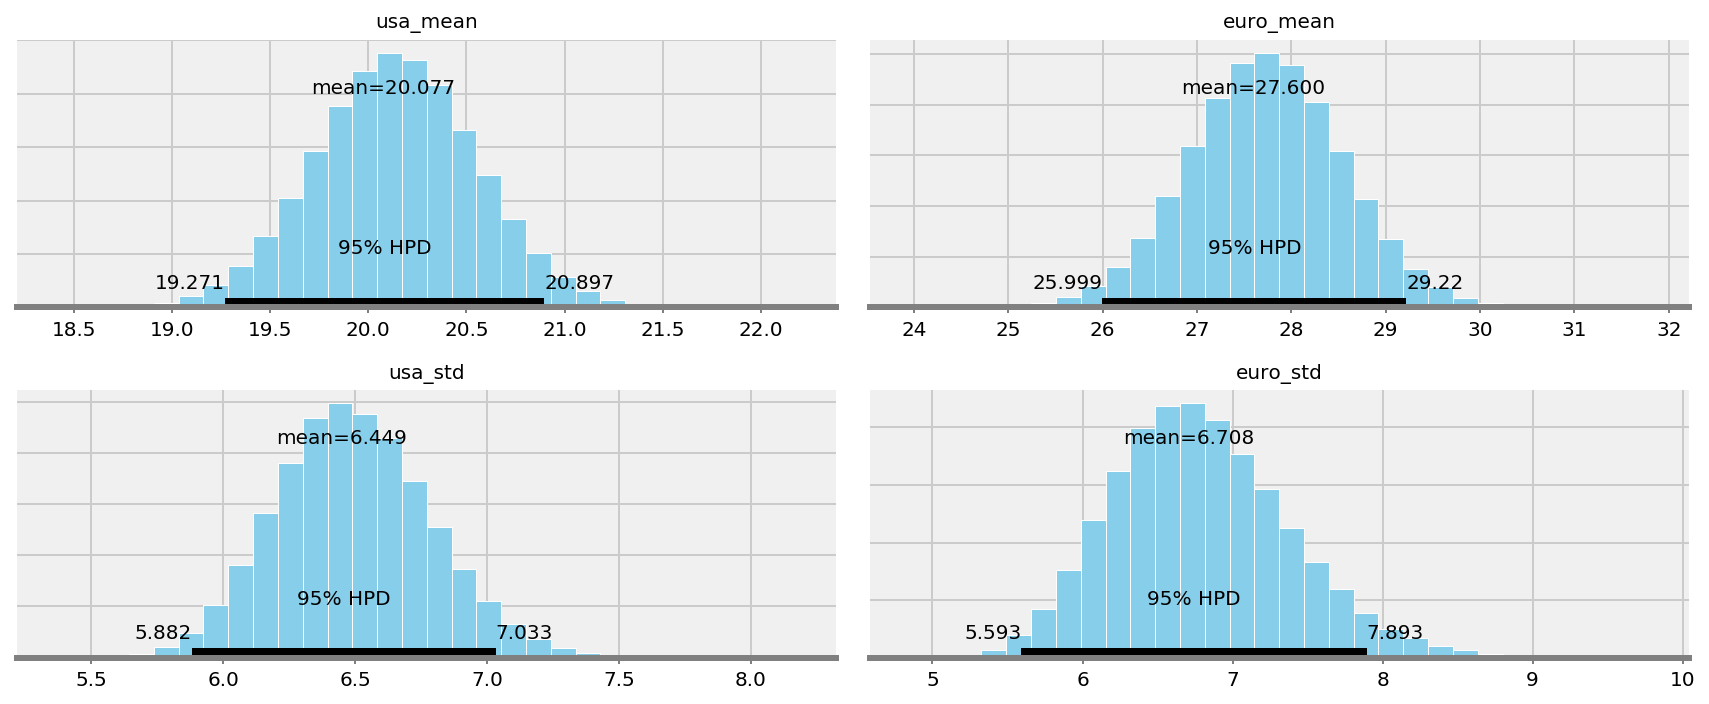

In [25]:
pm.plot_posterior(trace[1000:],
                  varnames=['usa_mean', 'euro_mean',
                            'usa_std', 'euro_std'],
                  color='#87ceeb')
plt.show()

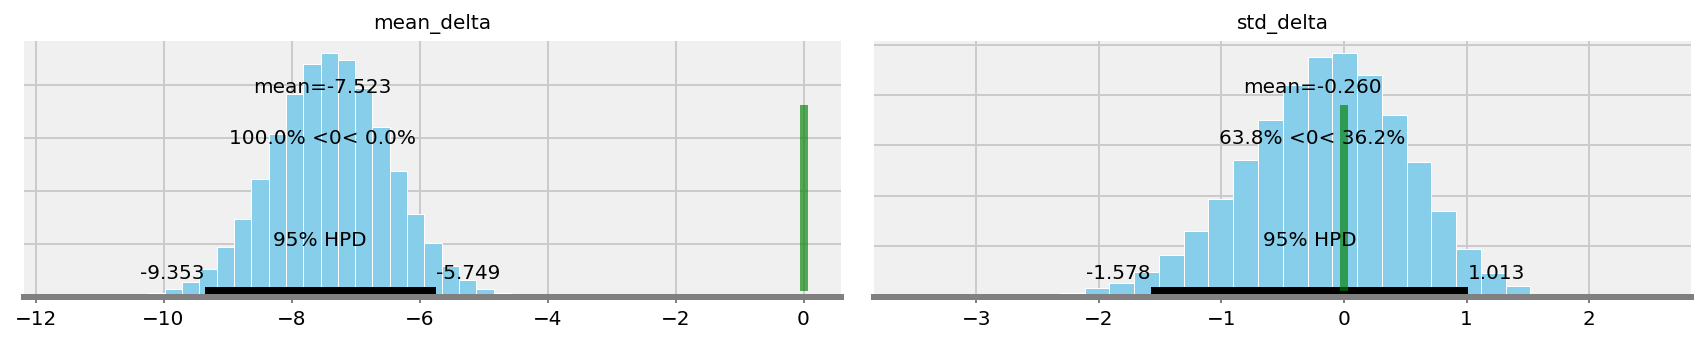

In [26]:
pm.plot_posterior(trace[1000:],
                  varnames=['mean_delta','std_delta'],
                  color='#87ceeb', 
                  ref_val=0)
plt.show()

### 4. Build a regression predicting MPG from predictors of your choice using `pymc3`.

You can construct the model at the granular level, or if you prefer use the patsy-formula model syntax (easier). Plot out the posterior distributions of your coefficients for your model.

Set up the distributions as like in the lesson. For the regression coefficients you can choose normal distributions as a setup.

In [27]:
# discard origin, name, maker and asian (or any one of american, euro or asian)
X = auto[['cylinders','displacement','horsepower','weight','acceleration','year','american','euro']]


# Rescaling will allow us to use the same standard deviation for all 
# the beta coefficient priors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [28]:
with pm.Model() as reg:
    
    sd_start = 60.
    
    mpg_std = pm.Uniform('error_std', lower=0.0001, upper=sd_start)
    #mpg_std = pm.HalfCauchy('error_std',beta=10)
    # could also use pm.HalfCauchy('error_std',beta=10) here
    # could also use Flat prior for intercept
    #intercept = pm.Flat('intercept')#
    intercept = pm.Normal('intercept', mu=0., sd=sd_start)
    cyl_beta = pm.Normal('cyl_beta', mu=0., sd=sd_start)
    disp_beta = pm.Normal('disp_beta', mu=0., sd=sd_start)
    horse_beta = pm.Normal('horse_beta', mu=0., sd=sd_start)
    weight_beta = pm.Normal('weight_beta', mu=0., sd=sd_start)
    acc_beta = pm.Normal('acc_beta', mu=0., sd=sd_start)
    year_beta = pm.Normal('year_beta', mu=0., sd=sd_start)
    usa_beta = pm.Normal('usa_beta', mu=0., sd=sd_start)
    euro_beta = pm.Normal('euro_beta', mu=0., sd=sd_start)
    
    E_mpg = pm.Normal('y_mean', 
                      mu=(intercept +
                          Xs.cylinders.values * cyl_beta +
                          Xs.displacement.values * disp_beta +
                          Xs.horsepower.values * horse_beta +
                          Xs.weight.values * weight_beta +
                          Xs.acceleration.values * acc_beta +
                          Xs.year.values * year_beta +
                          Xs.american.values * usa_beta + 
                          Xs.euro.values * euro_beta #+
                          #Xs.asian.values * asian_beta
                         ),
                      sd=mpg_std, observed=auto.mpg.values)

In [29]:
with reg:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace_reg = pm.sample(5000, step=step, start=start, njobs=4, tune=1000)

logp = -1,067.2, ||grad|| = 0.11706: 100%|██████████| 61/61 [00:00<00:00, 1172.78it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [euro_beta, usa_beta, year_beta, acc_beta, weight_beta, horse_beta, disp_beta, cyl_beta, intercept, error_std_interval__]
100%|██████████| 6000/6000 [01:19<00:00, 75.65it/s]


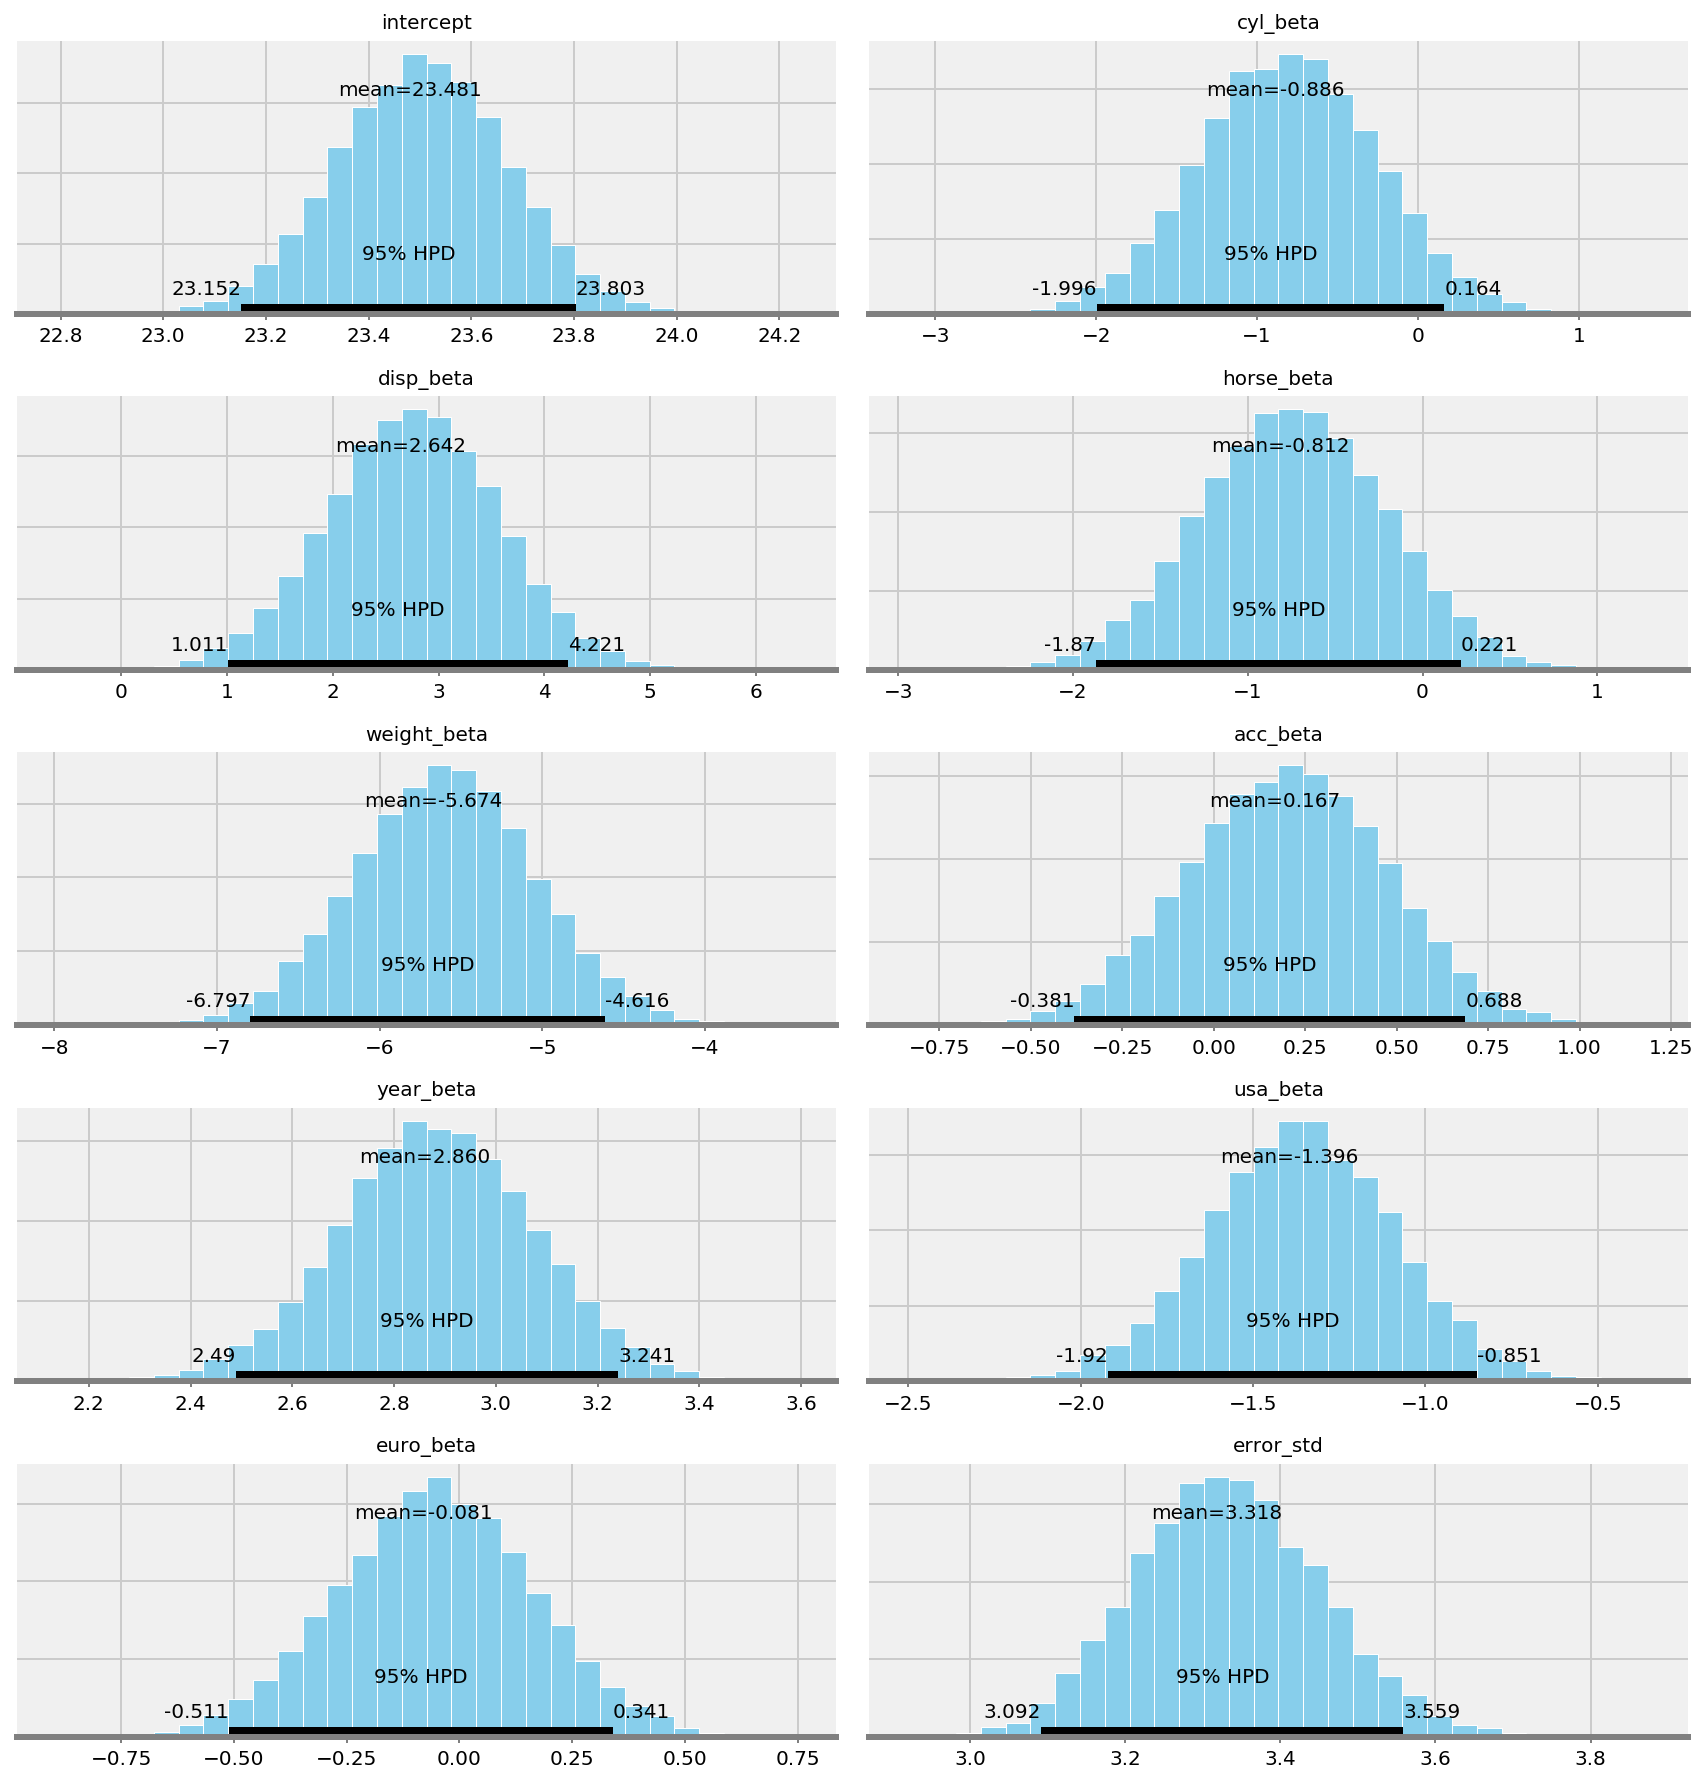

In [30]:
pm.plot_posterior(trace_reg[1000:],color='#87ceeb')
plt.show()

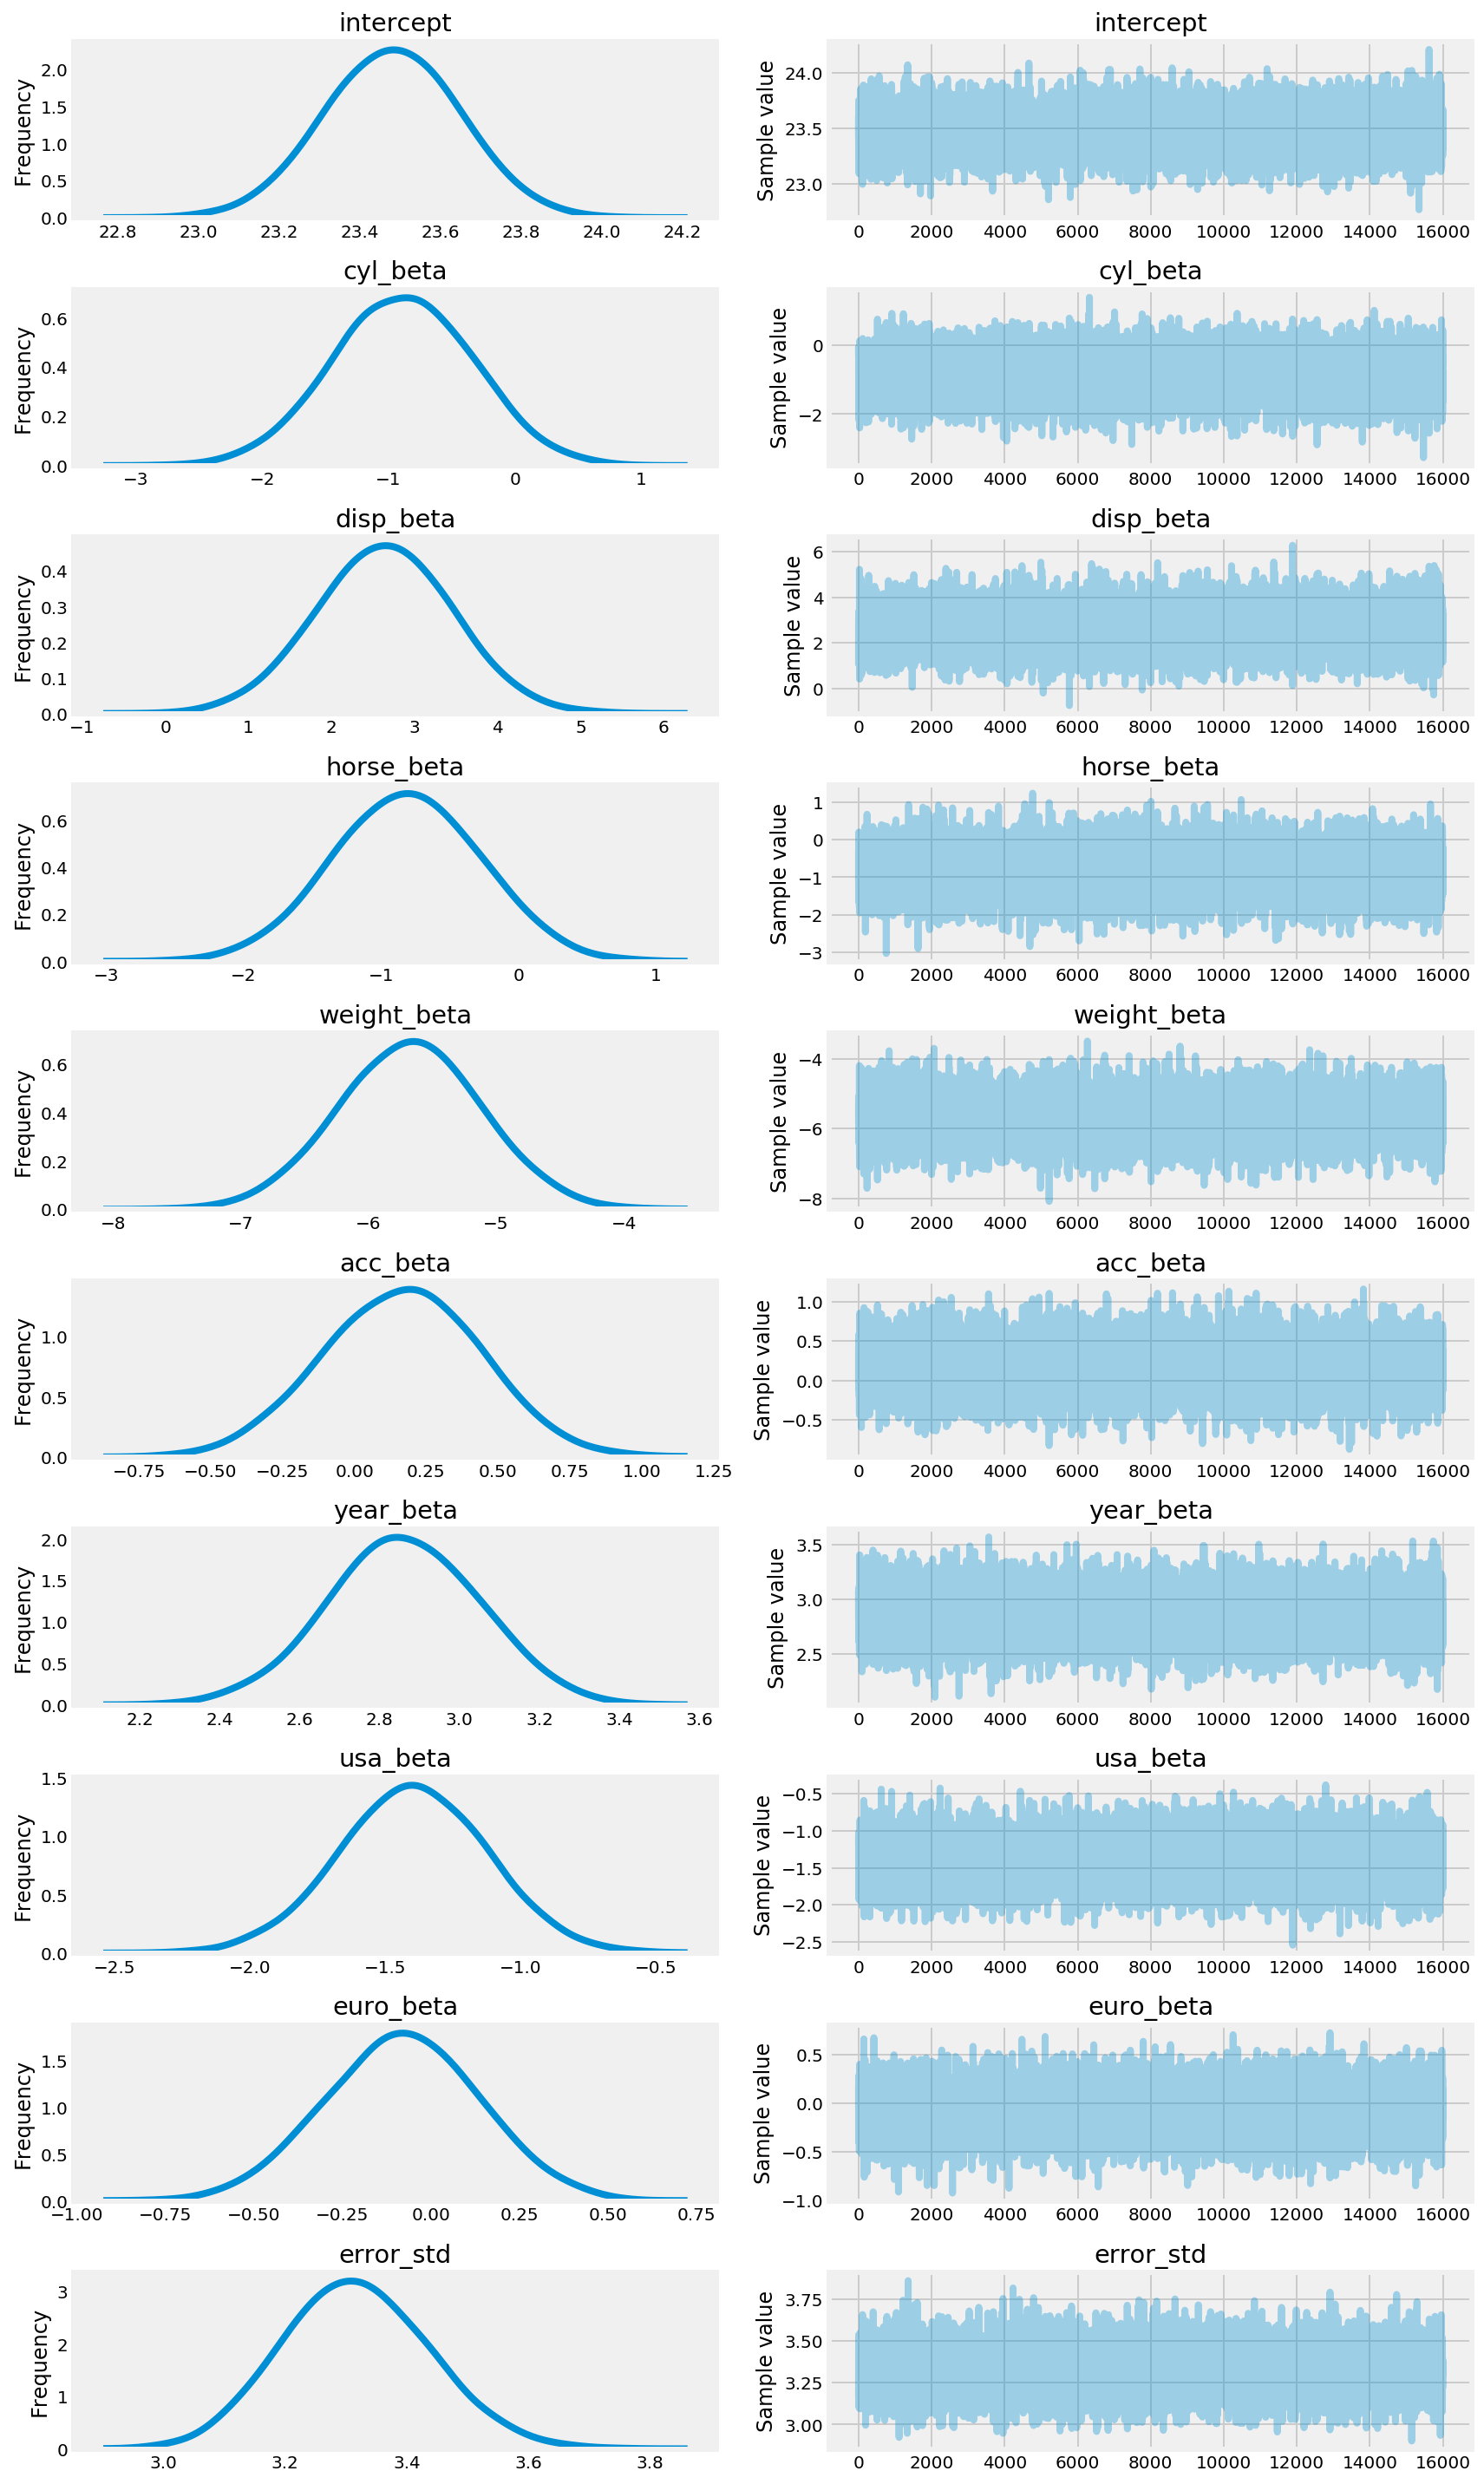

In [31]:
pm.traceplot(trace_reg[1000:],combined=True)
plt.tight_layout()
plt.show()

In [32]:
reg_summary = pm.summary(trace_reg[1000:])
reg_summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,23.481140,0.167236,0.001306,23.152066,23.803138,14521.986483,0.999899
cyl_beta,-0.886176,0.551554,0.005324,-1.995902,0.164153,10631.208010,0.999964
disp_beta,2.642045,0.815018,0.009603,1.011362,4.221003,8174.268750,0.999909
horse_beta,-0.811698,0.538117,0.004983,-1.869670,0.220602,8981.500128,1.000016
weight_beta,-5.673770,0.557851,0.006031,-6.797168,-4.616367,8351.008091,0.999932
acc_beta,0.166982,0.275164,0.002582,-0.380899,0.687897,9772.323300,1.000048
year_beta,2.860401,0.191417,0.001221,2.489870,3.240570,15981.672716,0.999914
usa_beta,-1.396047,0.271309,0.002300,-1.920447,-0.851177,11188.857398,1.000197
euro_beta,-0.080515,0.217654,0.001960,-0.511295,0.340936,12432.335013,1.000297
error_std,3.318230,0.120283,0.000936,3.091795,3.558642,15023.788603,1.000252


#### Using a patsy formula instead

In [33]:
Xs['mpg'] = auto.mpg.values

In [34]:
formula = 'mpg~'+('+').join([x for x in Xs.columns if x!='mpg'])

In [35]:
with pm.Model() as reg_glm:
    pm.glm.GLM.from_formula(formula, Xs)
    step = pm.NUTS()
    start = pm.find_MAP()
    trace_glm = pm.sample(5000, step=step, start=start, tune=1000)

logp = -1,083.4, ||grad|| = 0.060006: 100%|██████████| 67/67 [00:00<00:00, 1365.48it/s]      
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, euro, american, year, acceleration, weight, horsepower, displacement, cylinders, Intercept]
100%|██████████| 6000/6000 [00:42<00:00, 141.03it/s]


In [36]:
reg_glm_summary = pm.summary(trace_glm[1000:])
reg_glm_summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,23.483567,0.166846,0.002141,23.161438,23.814983,7825.268455,0.999910
cylinders,-0.875722,0.548038,0.007682,-1.959081,0.174280,5437.449696,1.000270
displacement,2.633729,0.819468,0.011804,0.999873,4.194440,4206.319035,0.999963
horsepower,-0.805450,0.541723,0.008339,-1.850682,0.259898,4318.803318,1.000056
weight,-5.679848,0.556965,0.008043,-6.767221,-4.619367,4683.044704,0.999948
acceleration,0.168448,0.275788,0.004181,-0.371108,0.708683,4554.993700,1.000219
year,2.862047,0.190318,0.002025,2.474921,3.223844,7596.693421,0.999939
american,-1.391159,0.270170,0.003388,-1.889292,-0.838843,5450.157325,0.999982
euro,-0.077258,0.214801,0.002831,-0.496690,0.348599,5597.122119,1.000260
sd,3.317831,0.118886,0.001286,3.089851,3.551343,7579.516371,0.999909


In [37]:
reg_glm.model

In [38]:
preds = pm.sample_ppc(trace_glm,model=reg_glm)

print(preds['y'].shape)

100%|██████████| 5000/5000 [00:02<00:00, 1694.98it/s]

(5000, 391)


In [39]:
# averaging over all samples allows to calculate the usual R2 score
from sklearn import metrics
metrics.r2_score(auto.mpg,preds['y'].mean(axis=0))

0.8229284459584586

#### Compare to sklearn

In [40]:
Xs.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
american        0
euro            0
mpg             0
dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression, BayesianRidge

lr = LinearRegression()

In [42]:
X = Xs.dropna()

In [43]:
cols = [x for x in Xs.columns if x!='mpg']
y = X.mpg
X = X[cols]

In [44]:
lr.fit(X,y)
print(lr.intercept_, list(zip(cols,lr.coef_)))

23.482864450127874 [('cylinders', -0.8820215875630864), ('displacement', 2.6458878654507725), ('horsepower', -0.807470141199695), ('weight', -5.683233597657468), ('acceleration', 0.1692640161142753), ('year', 2.862240023743503), ('american', -1.394517174621318), ('euro', -0.07935932248332751)]


In [45]:
lr.score(X,y)

0.823058983888965

#### Compare results from sklearn, hand-formulation and glm

In [46]:
np.around(lr.coef_ - reg_glm_summary['mean'].values[1:-1],2)

array([-0.01,  0.01, -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ])

In [47]:
np.around(lr.coef_ - reg_summary['mean'].values[1:-1],2)

array([ 0.  ,  0.  ,  0.  , -0.01,  0.  ,  0.  ,  0.  ,  0.  ])

In [48]:
np.around(reg_summary['mean'].values[1:-1] - reg_glm_summary['mean'].values[1:-1],2)

array([-0.01,  0.01, -0.01,  0.01, -0.  , -0.  , -0.  , -0.  ])